# Time-dependent KdV

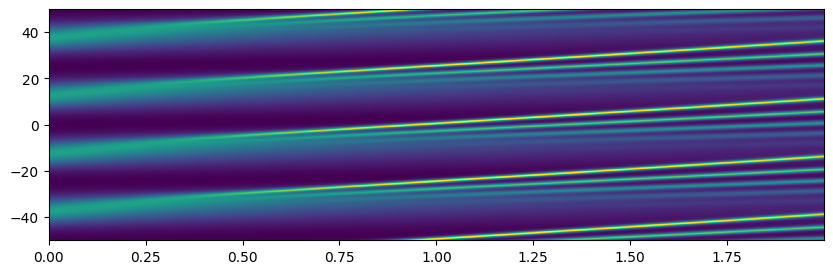

(1024, 20000)


In [1]:
import numpy as np
import pandas as pd
import pysindy as ps
import matplotlib.pyplot as plt

# Import the kdv data!
n = 20000 # number of time points to keep (out of 40001)
x = pd.read_csv("kdv_x.csv", header=None).to_numpy().flatten()
t = pd.read_csv("kdv_t.csv", header=None).to_numpy().flatten()[:n]
U = pd.read_csv("kdv_u.csv", header=None).to_numpy()[:, :n]

# Plot the kdv data.
plt.figure(figsize=(10, 3))
plt.pcolormesh(t, x, U)
plt.show()
print(U.shape)

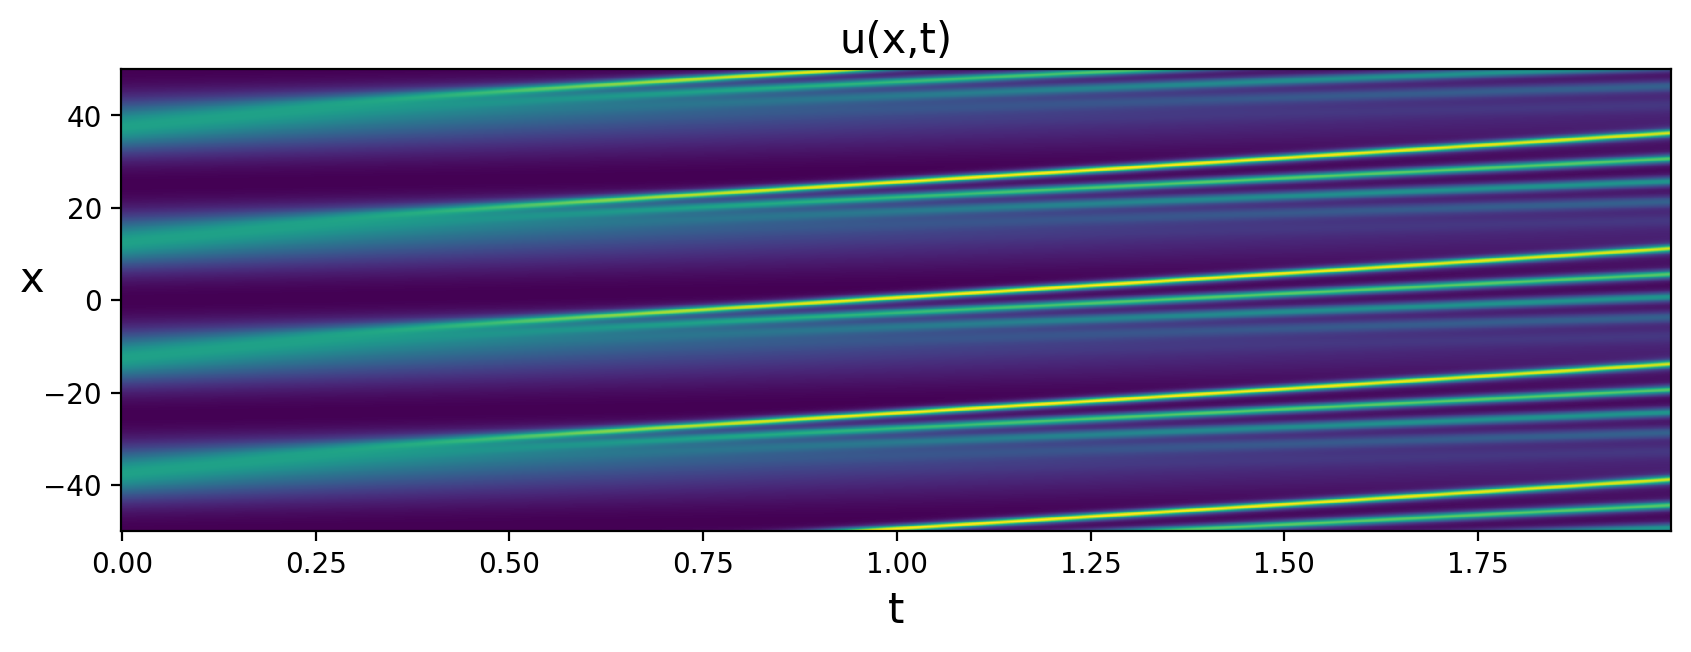

(1024, 20000)


In [2]:
# Reduce the time resolution...
t_skip = 10
tc = t[::t_skip]
Uc = U[:, ::t_skip]

# Plot the kdv data again...
plt.figure(figsize=(10, 3), dpi=200)
plt.pcolormesh(tc, x, Uc)
plt.title("u(x,t)", fontsize=15)
plt.xlabel("t", fontsize=15)
plt.ylabel("x", rotation=0, fontsize=15)
plt.show()
print(U.shape)

In [3]:
# Apply SINDy for PDEs...
# Sweep optimization parameters.
for t in [500, 600, 700, 800, 900, 1000]:
    for a in [1e-5, 1e-4, 1e-3]:
        print(f"Threshold = {t}")
        print(f"alpha = {a}")
        pde_lib = ps.PDELibrary(
            library_functions=[lambda x: x, lambda x: x * x],
            function_names=[lambda x: x, lambda x: x + x],
            derivative_order=3,
            spatial_grid=x,
            is_uniform=True,
        )
        pde_opt = ps.STLSQ(
            threshold=t,
            alpha=a,
            normalize_columns=True,
        )
        model = ps.SINDy(
            feature_library=pde_lib,
            optimizer=pde_opt,
            feature_names=["u"],
        )
        u = Uc.reshape(len(x), len(tc), 1)
        model.fit(u, t=tc[1]-tc[0])
        model.print()
        print()

Threshold = 500
alpha = 1e-05
(u)' = 0.459 u_1 + -1.022 u_111 + -6.558 uu_1 + 0.111 uuu_1

Threshold = 500
alpha = 0.0001
(u)' = 0.509 u_1 + -1.029 u_111 + -6.617 uu_1 + 0.129 uuu_1 + 0.003 uu_111

Threshold = 500
alpha = 0.001
(u)' = 0.561 u_1 + -1.023 u_111 + -6.681 uu_1 + 0.145 uuu_1 + -0.003 uu_111 + 0.002 uuu_111

Threshold = 600
alpha = 1e-05
(u)' = -0.998 u_111 + -6.208 uu_1 + 0.069 uuu_1

Threshold = 600
alpha = 0.0001
(u)' = 0.509 u_1 + -1.029 u_111 + -6.617 uu_1 + 0.129 uuu_1 + 0.003 uu_111

Threshold = 600
alpha = 0.001
(u)' = 0.561 u_1 + -1.023 u_111 + -6.681 uu_1 + 0.145 uuu_1 + -0.003 uu_111 + 0.002 uuu_111

Threshold = 700
alpha = 1e-05
(u)' = -0.998 u_111 + -6.208 uu_1 + 0.069 uuu_1

Threshold = 700
alpha = 0.0001
(u)' = 0.509 u_1 + -1.029 u_111 + -6.617 uu_1 + 0.129 uuu_1 + 0.003 uu_111

Threshold = 700
alpha = 0.001
(u)' = 0.561 u_1 + -1.023 u_111 + -6.681 uu_1 + 0.145 uuu_1 + -0.003 uu_111 + 0.002 uuu_111

Threshold = 800
alpha = 1e-05
(u)' = -1.037 u_111 + -6.090 uu

Expected equation:
$$
u_t = - u_{xxx} -6uu_x
$$